In [1]:
import os
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile('pizza_steak.zip', 'r')
zip_ref.extractall()
zip_ref.close()

--2025-02-14 11:20:12--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.181.91, 142.250.181.123, 142.250.181.155, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.181.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: 'pizza_steak.zip.1'

     0K .......... .......... .......... .......... ..........  0%  132K 13m28s
    50K .......... .......... .......... .......... ..........  0%  196K 11m16s
   100K .......... .......... .......... .......... ..........  0%  425K 8m54s
   150K .......... .......... .......... .......... ..........  0%  449K 7m40s
   200K .......... .......... .......... .......... ..........  0%  644K 6m41s
   250K .......... .......... .......... .......... ..........  0% 1.15M 5m49s
   300K .......... .......... .......... .......... ..........  0%  842K 5m17s
   350K ......

In [2]:
# Food101 dataset from kaggle.com/dansbecker/food-101

In [3]:
import os

num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))
num_steak_images_train

750

In [4]:
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape: {img.shape}")
    
    return img
        

Image shape: (512, 512, 3)


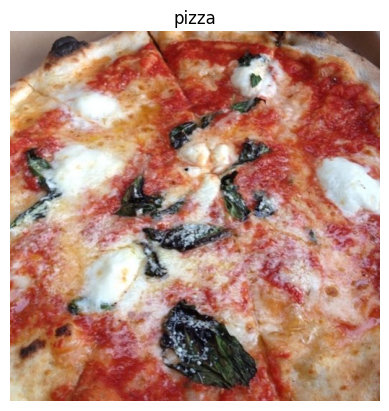

In [6]:
img = view_random_image(target_dir="pizza_steak/train/",  target_class="pizza")

In [7]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[185, 167, 157],
        [184, 166, 156],
        [183, 165, 155],
        ...,
        [132, 123, 118],
        [134, 126, 124],
        [133, 128, 125]],

       [[185, 167, 157],
        [184, 166, 156],
        [184, 166, 156],
        ...,
        [129, 120, 115],
        [132, 124, 121],
        [132, 127, 124]],

       [[184, 166, 156],
        [184, 166, 156],
        [184, 166, 156],
        ...,
        [123, 112, 108],
        [128, 118, 116],
        [131, 123, 120]],

       ...,

       [[222, 204, 168],
        [222, 204, 168],
        [224, 208, 174],
        ...,
        [127,  81,  45],
        [125,  77,  41],
        [121,  73,  37]],

       [[223, 203, 166],
        [223, 205, 169],
        [225, 209, 175],
        ...,
        [138,  90,  52],
        [132,  83,  43],
        [120,  71,  31]],

       [[221, 201, 164],
        [221, 203, 165],
        [222, 206, 172],
        ...,
        [149, 101,  6

In [8]:
# Let's build CNN to find patterns
# - load images
# - preprocess images
# - build a CNN 
# - compile CNN
# - fit CNN

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

#scaling
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# import data from directories and turn to batches
train_data = train_datagen.flow_from_directory(
    directory=train_dir, batch_size=32, target_size=(224, 224),
    class_mode="binary", seed=42
)

valid_data = valid_datagen.flow_from_directory(
    directory=test_dir, batch_size=32, target_size=(224, 224),
    class_mode="binary", seed=42
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [10]:
# Build a CNN

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(
        filters=10,kernel_size=3, activation="relu", input_shape=(224, 224, 3) 
    ),
    tf.keras.layers.Conv2D(
        filters=10,kernel_size=3, activation="relu" 
    ),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(
        filters=10,kernel_size=3, activation="relu" 
    ),
        tf.keras.layers.Conv2D(
        filters=10,kernel_size=3, activation="relu" 
    ),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

history_1 = model_1.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_steps=len(valid_data), validation_data=valid_data 
                    )

C:\code\tesnorflow-udemy\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\code\tesnorflow-udemy\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 320ms/step - accuracy: 0.5751 - loss: 0.6631 - val_accuracy: 0.7520 - val_loss: 0.5218
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 405ms/step - accuracy: 0.7438 - loss: 0.5251 - val_accuracy: 0.7960 - val_loss: 0.4646
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 228ms/step - accuracy: 0.7820 - loss: 0.4891 - val_accuracy: 0.8320 - val_loss: 0.3968
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 207ms/step - accuracy: 0.7819 - loss: 0.4690 - val_accuracy: 0.8280 - val_loss: 0.3894
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 210ms/step - accuracy: 0.8366 - loss: 0.3719 - val_accuracy: 0.8620 - val_loss: 0.3471


In [11]:
tf.random.set_seed(42)

model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model_2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

history_2 = model_2.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_steps=len(valid_data), validation_data=valid_data)

C:\code\tesnorflow-udemy\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 176ms/step - accuracy: 0.4996 - loss: 2.8612 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.5103 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - accuracy: 0.5082 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 148ms/step - accuracy: 0.5100 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.5104 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931


In [12]:
tf.random.set_seed(42)

model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model_3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

history_3 = model_3.fit(train_data, epochs=25, steps_per_epoch=len(train_data), validation_steps=len(valid_data), validation_data=valid_data)

Epoch 1/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 218ms/step - accuracy: 0.5617 - loss: 3.8083 - val_accuracy: 0.5960 - val_loss: 0.8696
Epoch 2/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 253ms/step - accuracy: 0.6796 - loss: 0.9212 - val_accuracy: 0.6980 - val_loss: 1.2038
Epoch 3/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 227ms/step - accuracy: 0.7556 - loss: 0.7118 - val_accuracy: 0.6360 - val_loss: 1.2917
Epoch 4/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 214ms/step - accuracy: 0.7400 - loss: 0.6700 - val_accuracy: 0.6900 - val_loss: 0.7568
Epoch 5/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 221ms/step - accuracy: 0.8112 - loss: 0.4547 - val_accuracy: 0.7300 - val_loss: 0.6287
Epoch 6/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 262ms/step - accuracy: 0.7880 - loss: 0.4836 - val_accuracy: 0.6740 - val_loss: 0.7147
Epoch 7/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 206ms/step - accuracy: 0.8188 - loss: 0.4021 - val_accuracy: 0.7620 - val_loss: 0.4847
Epoch 8/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 248ms/step - accuracy: 0.8169 - loss: 0.4097 - val_accu

In [13]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │    15,052,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

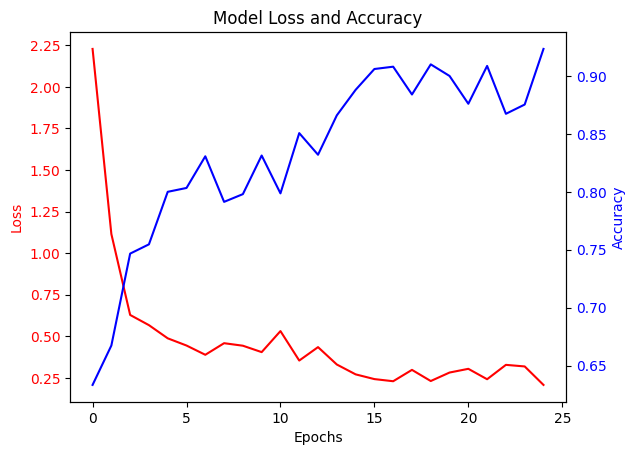

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert history to a DataFrame
df = pd.DataFrame(history_3.history)

# Create a figure and one set of axes
fig, ax1 = plt.subplots()

# Plot loss on ax1
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='red')
df['loss'].plot(ax=ax1, color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Create another axis for accuracy
ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy', color='blue')
df['accuracy'].plot(ax=ax2, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Model Loss and Accuracy')
plt.show()

In [15]:
#-------------------------------

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
train_data = train_datagen.flow_from_directory(directory=train_dir, batch_size=32, target_size=(224, 224), class_mode="binary")
test_data = test_datagen .flow_from_directory(directory=test_dir, batch_size=32, target_size=(224, 224), class_mode="binary")


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [18]:
images, labels = next(train_data)
len(images), len(labels)

(32, 32)

In [19]:
labels

array([0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1.],
      dtype=float32)

In [20]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [21]:
model_4 = Sequential([
    Conv2D(filters=10, kernel_size=(3,3), strides=1, padding='valid', activation='relu', input_shape=(224, 224, 3)),  # input
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid') #output (binary classification)
])

model_4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model_4.summary()

C:\code\tesnorflow-udemy\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 218, 218, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 475240)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │       475,241 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 477,341 (1.82 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
history_4 = model_4.fit(train_data, epochs=50, steps_per_epoch=len(train_data), validation_steps=len(test_data), validation_data=test_data)

C:\code\tesnorflow-udemy\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 233ms/step - accuracy: 0.5691 - loss: 1.9651 - val_accuracy: 0.8040 - val_loss: 0.5019
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 201ms/step - accuracy: 0.7807 - loss: 0.4747 - val_accuracy: 0.8040 - val_loss: 0.4560
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 196ms/step - accuracy: 0.8925 - loss: 0.3156 - val_accuracy: 0.8180 - val_loss: 0.4264
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 201ms/step - accuracy: 0.9681 - loss: 0.1278 - val_accuracy: 0.8320 - val_loss: 0.4046
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 211ms/step - accuracy: 0.9975 - loss: 0.0301 - val_accuracy: 0.8200 - val_loss: 0.4902
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 197ms/step - accuracy: 1.0000 - loss: 0.0073 - val_accuracy: 0.8220 - val_loss: 0.5176
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 198ms/step - accuracy: 1.0000 - loss: 0.0029 - val_accuracy: 0.8300 - val_loss: 0.5752
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 197ms/step - accuracy: 1.0000 - loss: 9.8002e-04 - val_accur

<Axes: >

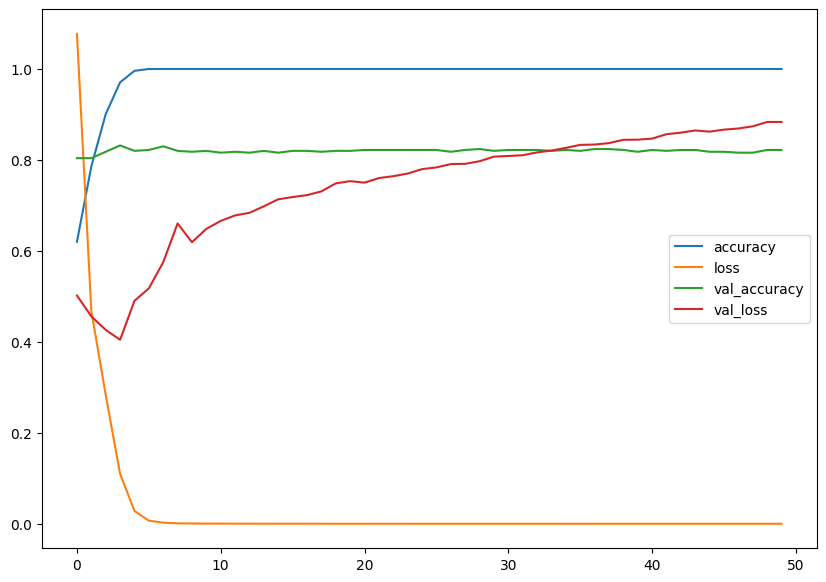

In [23]:
import pandas as pd 
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [24]:
# When a model validation loss isn't decreasing or even starts to increase, it's likely that the model is **overfitting**

In [25]:
import matplotlib.pyplot as plt

def plot_loss_curves(history):
    """
    Return Separate loss curves for training and validation metrics
    """
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    
    epochs = range(len(history.history['loss']))
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('loss')
    plt.xlabel('epochs')
    plt.legend()
    
    plt.figure()
    epochs = range(len(history.history['accuracy']))
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('accuracy')
    plt.xlabel('epochs')
    plt.legend()

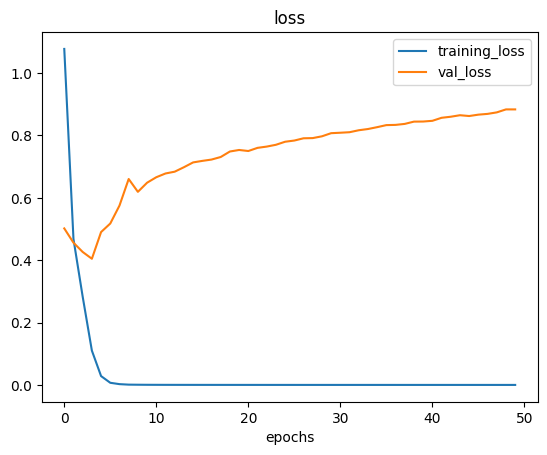

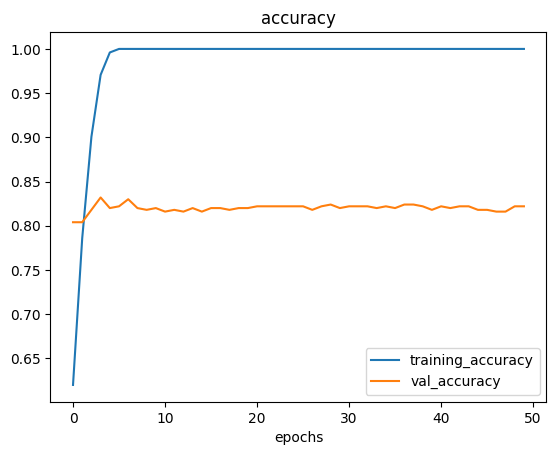

In [26]:
plot_loss_curves(history_4)

In [27]:
model_5 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid') 
])

model_5.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model_5.summary()

C:\code\tesnorflow-udemy\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 6760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │         6,761 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,861 (34.61 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
history_5 = model_5.fit(train_data, epochs=15, steps_per_epoch=len(train_data), validation_steps=len(test_data), validation_data=test_data)

Epoch 1/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 339ms/step - accuracy: 0.5399 - loss: 0.7010 - val_accuracy: 0.7120 - val_loss: 0.5713
Epoch 2/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 317ms/step - accuracy: 0.7724 - loss: 0.5174 - val_accuracy: 0.7660 - val_loss: 0.4784
Epoch 3/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 327ms/step - accuracy: 0.7791 - loss: 0.4737 - val_accuracy: 0.8520 - val_loss: 0.3592
Epoch 4/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 321ms/step - accuracy: 0.8149 - loss: 0.4265 - val_accuracy: 0.8520 - val_loss: 0.3558
Epoch 5/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 339ms/step - accuracy: 0.8371 - loss: 0.3898 - val_accuracy: 0.8600 - val_loss: 0.3196
Epoch 6/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 338ms/step - accuracy: 0.8300 - loss: 0.3751 - val_accuracy: 0.8900 - val_loss: 0.3038
Epoch 7/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 332ms/step - accuracy: 0.8462 - loss: 0.3731 - val_accuracy: 0.8620 - val_loss: 0.3184
Epoch 8/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 348ms/step - accuracy: 0.8754 - loss: 0.3169 - val_accu

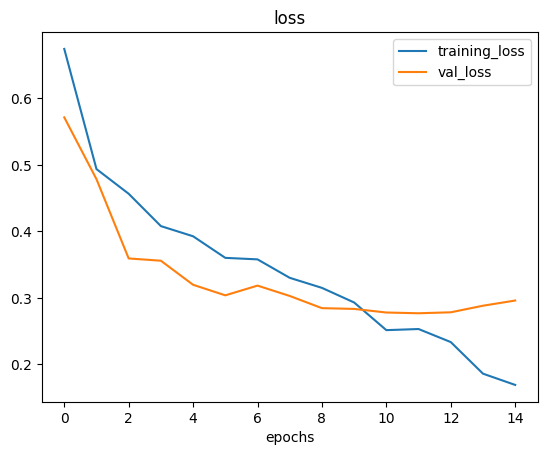

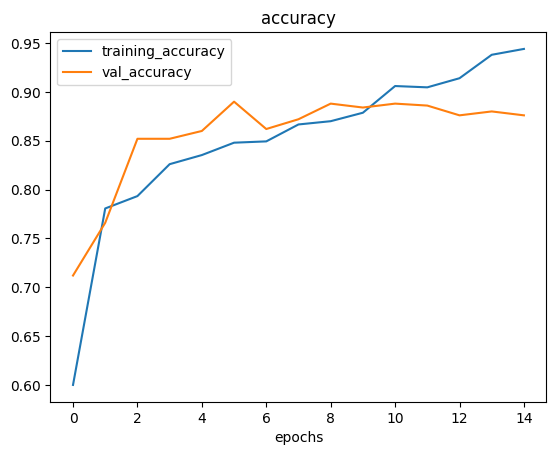

In [29]:
plot_loss_curves(history_5)

In [30]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen_aug = ImageDataGenerator(rescale=1./255, 
                                       rotation_range=0.2,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       width_shift_range=0.2,
                                       height_shift_range=0.3,
                                       horizontal_flip=True)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [31]:
IMG_SIZE=(224,224)

print('Augmented training data')
train_data_aug = train_datagen_aug.flow_from_directory(
    train_dir, target_size=IMG_SIZE, batch_size=32, class_mode="binary",
    shuffle=False 
) #demo

# create non-augmented
print('Non-Augmented training data')
train_data = train_datagen.flow_from_directory(train_dir, batch_size=32, target_size=IMG_SIZE, class_mode="binary", shuffle=False)



print('Non Augmented test data')
test_data = test_datagen.flow_from_directory(test_dir, target_size=IMG_SIZE, batch_size=32, class_mode="binary")


Augmented training data
Found 1500 images belonging to 2 classes.
Non-Augmented training data
Found 1500 images belonging to 2 classes.
Non Augmented test data
Found 500 images belonging to 2 classes.


In [32]:
images, labels = next(train_data)
augmented_images, augmented_labels = next(train_data_aug)

In [33]:
import random

random_number = random.randint(0, len(train_data))

print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented")


Showing image number: 37


IndexError: index 37 is out of bounds for axis 0 with size 32

In [16]:
model_6 = Sequential([
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_6.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

history_6 = model_6.fit(train_data_aug, 
                          epochs=5, 
                        steps_per_epoch=len(train_data_aug),
                        validation_steps=len(test_data),
                        validation_data=test_data
                        )

C:\code\tesnorflow-udemy\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 34s 665ms/step - accuracy: 0.5508 - loss: 0.7964 - val_accuracy: 0.5020 - val_loss: 0.6863
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 27s 579ms/step - accuracy: 0.4998 - loss: 0.6928 - val_accuracy: 0.6460 - val_loss: 0.6845
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 26s 564ms/step - accuracy: 0.5505 - loss: 0.6912 - val_accuracy: 0.5760 - val_loss: 0.6786
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 36s 763ms/step - accuracy: 0.4710 - loss: 0.6937 - val_accuracy: 0.6440 - val_loss: 0.6791
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 460ms/step - accuracy: 0.6148 - loss: 0.6870 - val_accuracy: 0.7380 - val_loss: 0.6647


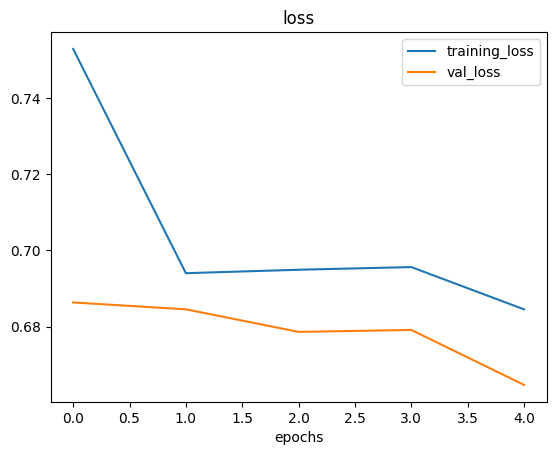

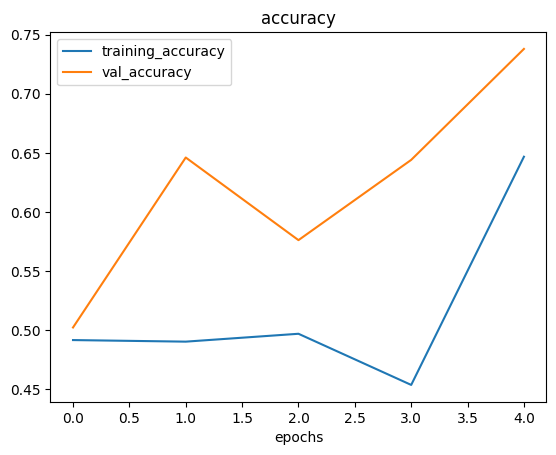

In [20]:
plot_loss_curves(history_6)